Shape: (920, 16)

Missing values:
 id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

Target distribution (raw):
num
0    411
1    265
2    109
3    107
4     28
Name: count, dtype: int64


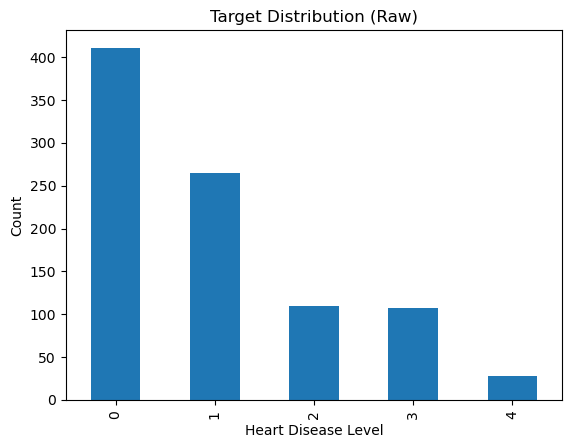

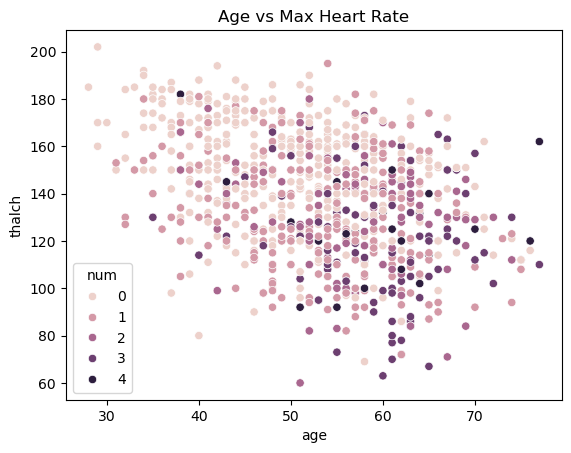

C=0.01, F1-score=0.7600
C=0.1, F1-score=0.8077
C=1, F1-score=0.8302
C=10, F1-score=0.8302
C=100, F1-score=0.8302

Best C: 1
Best F1-score: 0.8301886792452831

Classification Report:

              precision    recall  f1-score   support

           0       0.83      0.91      0.87        32
           1       0.88      0.79      0.83        28

    accuracy                           0.85        60
   macro avg       0.85      0.85      0.85        60
weighted avg       0.85      0.85      0.85        60



In [ ]:
# 1. IMPORT LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import f1_score, classification_report

# 2. LOAD DATASET
df = pd.read_csv("heart_disease_uci.csv")

# 3. MINIMUM EDA
print("Shape:", df.shape)
print("\nMissing values:\n", df.isnull().sum())

print("\nTarget distribution (raw):")
print(df["num"].value_counts())

# Plot 1: Target distribution
df["num"].value_counts().plot(kind="bar", title="Target Distribution (Raw)")
plt.xlabel("Heart Disease Level")
plt.ylabel("Count")
plt.show()

# Plot 2: Age vs Max Heart Rate
sns.scatterplot(x="age", y="thalch", hue="num", data=df)
plt.title("Age vs Max Heart Rate")
plt.show()

# 4. DATA CLEANING
# Drop non-useful columns
df.drop(["id", "dataset"], axis=1, inplace=True)

# Convert target to binary
df["num"] = df["num"].apply(lambda x: 1 if x > 0 else 0)

# Drop missing values
df = df.dropna()

# 5. SEPARATE FEATURES & TARGET
X = df.drop("num", axis=1)
y = df["num"]

# 6. ONE-HOT ENCODING (CRITICAL STEP)
X = pd.get_dummies(X, drop_first=True)

# 7. TRAIN / VALIDATION SPLIT
X_train, X_val, y_train, y_val = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# 8. FEATURE SCALING
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# 9. LINEAR SVM WITH C TUNING
C_values = [0.01, 0.1, 1, 10, 100]
best_f1 = 0
best_C = None
best_model = None

for C in C_values:
    svm = SVC(kernel="linear", C=C)
    svm.fit(X_train_scaled, y_train)

    y_pred = svm.predict(X_val_scaled)
    f1 = f1_score(y_val, y_pred)

    print(f"C={C}, F1-score={f1:.4f}")

    if f1 > best_f1:
        best_f1 = f1
        best_C = C
        best_model = svm

print("\nBest C:", best_C)
print("Best F1-score:", best_f1)

# 10. FINAL EVALUATION
y_final_pred = best_model.predict(X_val_scaled)

print("\nClassification Report:\n")
print(classification_report(y_val, y_final_pred))
